<a href="https://colab.research.google.com/github/collinscolour/GoMyCodeCheckPoint/blob/main/UnsupervisedAssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on 'Customer purchases history' dataset provided by Kaggle

Dataset description: This dataset contains historical records for customer purchases from a supermarket X. The objective is to find the association rules to help supermarket owners find new marketing plans to improve their sales.

➡️ Dataset link

🚧 Each row correspond to one purchase


Instructions
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Run the apriori algorithm on the provided toy_dataset. Interpret the results.
Try to explore the checkpoint dataset using Pandas and Plotly.
Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

In [1]:
!pip install plotly

In [2]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e847d2d45b84aae355f7fec0064ffa8e44567e32813c570bd5b12b51ce904bf9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [1]:

#import
import pandas as pd
from ydata_profiling import ProfileReport
from scipy import stats
import numpy as np
import plotly.express as px
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
import plotly.graph_objects as go

In [13]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
print(data.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [3]:
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [4]:
len(toy_dataset)

5

In [26]:
tee=TransactionEncoder()
dataa= pd.read_csv("Market_Basket_Optimisation.csv")
#Apply one-hot-encoding on our dataset
te_ary =tee.fit(dataa).transform(dataa)

#Creating a new DataFrame from our Numpy array
dff=pd.DataFrame(te_ary, columns=tee.columns_)
dff

a      b      c      d      e      f      g      h      i  \
0     False  False  False  False  False  False  False  False   True   True   
1     False   True  False  False   True  False  False  False  False  False   
2     False   True  False   True   True  False  False  False  False  False   
3      True   True   True  False  False   True  False   True  False   True   
4      True   True  False  False  False   True  False   True  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7495  False  False  False  False  False  False  False  False  False  False   
7496  False  False  False  False  False  False  False  False  False  False   
7497  False  False  False  False  False  False  False  False  False  False   
7498  False  False  False  False  False  False  False  False  False  False   
7499  False  False  False  False  False  False  False  False  False  False   

      ...      p      r      s      t      u      v      w      x      y  \
0     ...   True   True   True  False  False  False  False  False  False   
1     ...  False  False   True  False  False  False  False  False  False   
2     ...  False  False  False  False  False   True  False  False  False   
3     ...  False  False   True   True  False   True  False   True  False   
4     ...   True   True   True  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
7495  ...  False  False  False  False  False  False  False  False  False   
7496  ...  False  False  False  False  False  False  False  False  False   
7497  ...  False  False  False  False  False  False  False  False  False   
7498  ...  False  False  False  False  False  False  False  False  False   
7499  ...  False  False  False  False  False  False  False  False  False   

          z  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
7495  False  
7496  False  
7497  False  
7498  False  
7499  False  

[7500 rows x 26 columns]

In [27]:
profile = ProfileReport(dff)

# Save the report to HTML
profile.to_file('report.html')

#display all report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
te=TransactionEncoder()
#Apply one-hot-encoding on our dataset
te_toy=te.fit(toy_dataset).transform(toy_dataset)

#Creating a new DataFrame from our Numpy array
df=pd.DataFrame(te_toy, columns=te.columns_)
df

Dress  Earrings    Hat  Heels  Necklace  Pants  Sandals  Scarf  Shirt  \
0  False     False   True  False     False   True    False   True  False   
1  False     False   True  False     False   True    False  False  False   
2   True     False  False   True     False   True     True   True  False   
3   True      True   True   True      True  False    False   True  False   
4  False      True  False  False     False   True    False   True   True   

   Skirt  Sneakers  Sunglasses  
0   True      True       False  
1   True      True        True  
2  False     False       False  
3  False     False       False  
4   True     False       False

In [6]:
profile = ProfileReport(df)

# Save the report to HTML
profile.to_file('report.html')

#display all report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.describe()

Dress Earrings   Hat  Heels Necklace Pants Sandals Scarf  Shirt Skirt  \
count       5        5     5      5        5     5       5     5      5     5   
unique      2        2     2      2        2     2       2     2      2     2   
top     False    False  True  False    False  True   False  True  False  True   
freq        3        3     3      3        4     4       4     4      4     3   

       Sneakers Sunglasses  
count         5          5  
unique        2          2  
top       False      False  
freq          3          4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dress       5 non-null      bool 
 1   Earrings    5 non-null      bool 
 2   Hat         5 non-null      bool 
 3   Heels       5 non-null      bool 
 4   Necklace    5 non-null      bool 
 5   Pants       5 non-null      bool 
 6   Sandals     5 non-null      bool 
 7   Scarf       5 non-null      bool 
 8   Shirt       5 non-null      bool 
 9   Skirt       5 non-null      bool 
 10  Sneakers    5 non-null      bool 
 11  Sunglasses  5 non-null      bool 
dtypes: bool(12)
memory usage: 188.0 bytes


In [9]:
for col in df.columns:
  print(col)
  print(df[col].sum())

Dress
2
Earrings
2
Hat
3
Heels
2
Necklace
1
Pants
4
Sandals
1
Scarf
4
Shirt
1
Skirt
3
Sneakers
2
Sunglasses
1


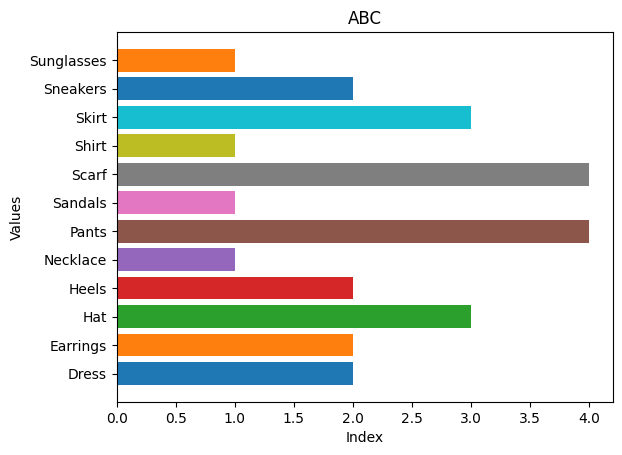

In [10]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.barh(col, df[col].sum(), label=col)
  #plt.plot(df.index, col, label=col)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('ABC')
# Show the plot
plt.show()

In [11]:
profile = ProfileReport(data)

# Save the report to HTML
profile.to_file('report.html')

#display all report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
data.describe()

olive oil
count        0.0
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

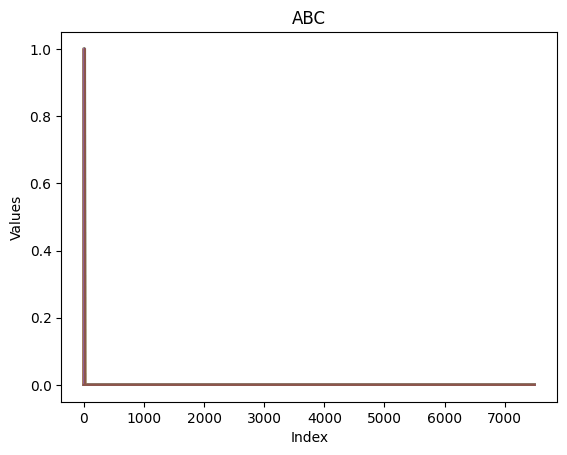

In [18]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.plot(df.index, df[col], label=col)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('ABC')
# Show the plot
plt.show()

In [19]:
traces = []
for col in data.columns:
  trace = go.Scatter(y=list(range(len(data))),x=data[col], name=col, mode="lines")
  traces.append(trace)
# Create layout
layout = go.Layout(title="Plotly: All Rows as Y-Axis and Columns as X-Axis", yaxis=dict(title="Row Index"), xaxis=dict(title="Column Values"))

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Plot the figure
fig.show()